In [17]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.externals import joblib 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [0]:
import pandas as pd
path='/content/drive/My Drive/sih/bnsl.csv'
df = pd.read_csv(path)
del df['v']
del df['t']

In [0]:
list(df.columns)

['x', 'y', 'z', 'FlightId']

In [0]:
flightId = list(set(df.FlightId))
len(flightId)

2129

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
trainFlight, testFlight = train_test_split(flightId, test_size=0.6, random_state=42)

In [0]:
# flightSize = int(len(flightId)*0.7)
# trainFlight = flightId[:flightSize]
# testFlight  = flightId[flightSize:]

In [0]:
trainDf = df[df.FlightId.isin(trainFlight)].copy()
trainDf.reset_index(inplace = True,drop=True)
testDf = df[df.FlightId.isin(testFlight)].copy()
testDf.reset_index(inplace = True,drop=True)

In [0]:
trainId = trainDf['FlightId'].copy()
testId = testDf['FlightId'].copy()
del trainDf['FlightId']
del testDf['FlightId']

In [0]:
Cols  = list(trainDf.columns)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
trainDf[Cols] = scaler.fit_transform(trainDf[Cols])
testDf[Cols] = scaler.transform(testDf[Cols])

In [0]:
trainDf.head()

,x,y,z
0,0.410300,0.438836,0.002851
1,0.408161,0.440124,0.010230
2,0.405964,0.441412,0.017944
3,0.403703,0.442712,0.025658
4,0.401383,0.444013,0.033037


In [0]:
testDf.head()

,x,y,z
0,0.702410,0.254119,0.040416
1,0.700620,0.254080,0.042093
2,0.698656,0.253958,0.043435
3,0.696601,0.253746,0.044105
4,0.694605,0.253430,0.043938


In [0]:
#Reshape data for RNN/LSTM
def create_dataset(data, k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] -k):
        x = data[i:i+k,:]
        y = data[i+k,:]
        dataX.append(x)
        dataY.append(y)
    return dataX,dataY

In [0]:
trainDf['fid'] = trainId

In [0]:
testDf['fid'] = testId

In [0]:
trainDf

,x,y,z,fid
0,0.410300,0.438836,0.002851,0
1,0.408161,0.440124,0.010230,0
2,0.405964,0.441412,0.017944,0
3,0.403703,0.442712,0.025658,0
4,0.401383,0.444013,0.033037,0
...,...,...,...,...
132867,0.421343,0.451218,0.011739,2128
132868,0.420302,0.449235,0.008720,2128
132869,0.419256,0.447258,0.005534,2128
132870,0.418183,0.445327,0.002851,2128


In [0]:
testDf

,x,y,z,fid
0,0.702410,0.254119,0.040416,2
1,0.700620,0.254080,0.042093,2
2,0.698656,0.253958,0.043435,2
3,0.696601,0.253746,0.044105,2
4,0.694605,0.253430,0.043938,2
...,...,...,...,...
195242,0.945037,0.637506,0.883280,2127
195243,0.951073,0.640745,0.889821,2127
195244,0.957075,0.644074,0.895355,2127
195245,0.963072,0.647467,0.900218,2127


In [0]:
def createDataset(df,look_back):    
    trainX = []
    trainY = []
    fid = list(set(df['fid']))
    # print(fid[:1])
    for flightId in fid:
        tempDf = df[df.fid == flightId].copy()
        del tempDf['fid']
        tempDf.reset_index(drop = True,inplace = True)
        x,y = create_dataset(tempDf.values,look_back)
        trainX.extend(x)
        trainY.extend(y)
    return  trainX,trainY

In [0]:
x,y = createDataset(trainDf,5)
x,y = np.array(x), np.array(y)

In [0]:
x.shape, y.shape

((128617, 5, 3), (128617, 3))

In [0]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras import optimizers
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

In [0]:
adam = optimizers.Adam()
look_back = 5

In [0]:
x.shape, y.shape

((128617, 5, 3), (128617, 3))

In [0]:
model = Sequential()
# model.add(SimpleRNN(12,input_shape = (look_back, 1),activation='relu'))
model.add(SimpleRNN(12,input_shape = (look_back, 3)))
# model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Dense(3))
model.compile(loss='mean_squared_error',optimizer=adam)
model.fit(x,y,epochs = 30 ,batch_size =1000)

Epoch 1/30
128617/128617 [==============================] - 1s 9us/step - loss: 0.0447
Epoch 2/30
128617/128617 [==============================] - 1s 7us/step - loss: 0.0050
Epoch 3/30
128617/128617 [==============================] - 1s 7us/step - loss: 0.0014
Epoch 4/30
128617/128617 [==============================] - 1s 7us/step - loss: 8.8477e-04
Epoch 5/30
128617/128617 [==============================] - 1s 7us/step - loss: 6.9168e-04
Epoch 6/30
128617/128617 [==============================] - 1s 7us/step - loss: 5.6733e-04
Epoch 7/30
128617/128617 [==============================] - 1s 7us/step - loss: 4.7096e-04
Epoch 8/30
128617/128617 [==============================] - 1s 7us/step - loss: 3.9353e-04
Epoch 9/30
128617/128617 [==============================] - 1s 7us/step - loss: 3.3117e-04
Epoch 10/30
128617/128617 [==============================] - 1s 7us/step - loss: 2.7994e-04
Epoch 11/30
128617/128617 [==============================] - 1s 7us/step - loss: 2.3893e-04
Epoch 12/

In [0]:
y_predict = model.predict(x)

In [0]:
from sklearn.metrics import r2_score

In [0]:
y_predict.shape

(128617, 3)

In [0]:
y.shape

(128617, 3)

In [0]:
y_true = scaler.inverse_transform(y)
y_pred = scaler.inverse_transform(y_predict)

In [0]:
r2_score(y_true,y_pred)

0.9989671072910161

In [0]:
x_test,y_test = createDataset(testDf,5)
x_test,y_test = np.array(x_test), np.array(y_test)

In [0]:
y_test_pred = model.predict(x_test)

In [0]:
y_true1 = scaler.inverse_transform(y_test)
y_pred1 = scaler.inverse_transform(y_test_pred)

In [0]:
r2_score(y_true1,y_pred1)

0.998959266086756

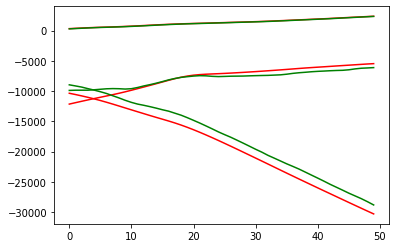

In [0]:
a, b= y_true1[:50,:],y_pred1[:50,:]
import matplotlib.pyplot as plt
plt.plot(a,c='r')
plt.plot(b,c='g')
plt.show()

In [0]:
testDf

,x,y,z,fid
0,0.702410,0.254119,0.040416,2
1,0.700620,0.254080,0.042093,2
2,0.698656,0.253958,0.043435,2
3,0.696601,0.253746,0.044105,2
4,0.694605,0.253430,0.043938,2
...,...,...,...,...
195242,0.945037,0.637506,0.883280,2127
195243,0.951073,0.640745,0.889821,2127
195244,0.957075,0.644074,0.895355,2127
195245,0.963072,0.647467,0.900218,2127


In [0]:
joblib.dump(scaler, '/content/drive/My Drive/sih/scaler.pkl')

['/content/drive/My Drive/sih/scaler.pkl']

In [0]:
from collections import deque
def predictValus(x,look_back,lenPred):
  global model
  pred = []
  pred.extend(list(x))
  x = deque(x)
  assert(len(x) == look_back)
  for i in range(lenPred):
    x_prime = model.predict(np.array(x).reshape((1,look_back,3)))
    x.append(x_prime)
    x.popleft()
    x.append(x_prime)
  return x

In [0]:
vDf = pd.read_csv("/content/drive/My Drive/sih/testtraj.csv")

In [0]:
del vDf['v']
del vDf['t']
vDf[Cols] = scaler.transform(vDf[Cols])
vDf['fid'] = 0

In [0]:
xVal,yVal = createDataset(vDf,5)

In [0]:
xVal = np.array(xVal)
yVal = np.array(yVal)

In [0]:
y_pred_val = model.predict(xVal)

In [0]:
y_val_true = scaler.inverse_transform(yVal)
y_val_pred = scaler.inverse_transform(y_pred_val)
r2_score(y_val_true,y_val_pred)

0.9978635718768114

In [0]:
%cd /content/drive/My Drive/sih

/content/drive/My Drive/sih


In [0]:
architecture = model.to_json()

In [0]:
#saving the jason file in system(on the hard disk)
with open("architecture.json", "w") as json_file:
    json_file.write(architecture)

In [0]:
#now we are saving the trained weights
model.save_weights("weights.h5")